In [9]:
import numpy as np
import matplotlib.pyplot as plt
import corporate_design_colours_v3 as cpd
plt.style.use('thesis_half.mplstyle')

In [68]:

    
g=2.0023
q=1.60217662e-19 #C
m_e=9.10938356e-31 #kg
gamma=g*q/(2*m_e)*1e-9/(2*np.pi)

mu_0=1.2566e-6 #N/A²   
M_0=.001/mu_0
H_0=.001/mu_0
Df=.3
Dw=Df*2*np.pi
fres=4
wres=2*np.pi*fres

f=np.linspace(3,5,400)
w=2*np.pi*f
#chi=np.max(np.abs(chi))


In [69]:
chi=gamma*mu_0*M_0*(gamma*H_0*mu_0-1j*Dw)/(wres**2-w**2-1j*w*Dw)
#chi=chi/np.max(np.abs(chi))
#chi=np.real(chi)-np.min(np.real(chi))+1j*np.imag(chi)-1j*np.mean(np.imag(chi))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


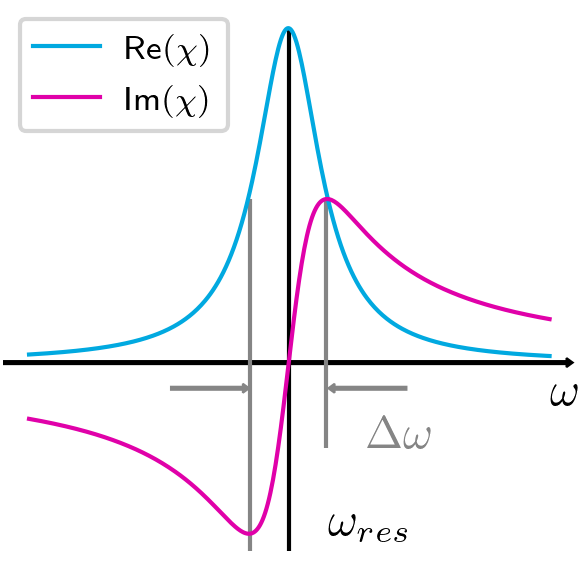

In [166]:

#plt.plot(f,np.abs(chi))
#plt.xlabel('$\chi$')
from matplotlib.lines import Line2D

fig = plt.figure(1, figsize=(2,2))
ax = fig.add_subplot(1, 1, 1)

imag=np.imag(chi)
real=np.real(chi)
#fig.patch.set_visible(False)

ax.axis('off')

#plt.axhline(color='black', lw=0.5)
#plt.axvline(wres,color='black', lw=0.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('$\omega$')

plt.vlines(w[np.argmin(np.abs(imag-np.max(imag)))],
           ymin=np.min(imag)*.5,ymax=np.max(imag),
           color=cpd.curves(color='black')(.8))
plt.vlines(w[np.argmin(np.abs(imag-np.min(imag)))],
           ymin=np.min(imag)*1.1,ymax=np.max(imag),
           color=cpd.curves(color='black')(.8))
plt.vlines(w[np.argmin(np.abs(real-np.max(real)))],
           ymin=np.min(imag)*1.1,ymax=np.max(real),
           color=cpd.curves(color='black')(1))

plt.plot(w,np.real(chi),label='Re$(\chi)$',color=cpd.curves()(1))
plt.plot(w,np.imag(chi), label='Im$(\chi)$',color=cpd.curves(color='magenta')(1))
plt.legend(loc=2, prop={'size': 8})
xlimm=ax.get_xlim()
plt.arrow(xlimm[0],0,.995*(xlimm[1]-xlimm[0]),0,width=.00001, lw=.5,
          head_width=.00003, head_length=.15,
          length_includes_head=True, color='black')
ax.set_xlim(xlimm)

plt.arrow((fres-Df*1.515)*2*np.pi,np.min(imag)*.15,Df*np.pi*2,0,width=.00001, lw=.5,
          head_width=.00003, head_length=.15, length_includes_head=True,
          color=cpd.curves(color='black')(.8))
plt.arrow((fres+Df*1.5)*2*np.pi,np.min(imag)*.15,-Df*np.pi*2,0,width=.00001, lw=.5,
          head_width=.00003, head_length=.15, length_includes_head=True,
          color=cpd.curves(color='black')(.8))
plt.text(w[np.argmin(np.abs(real-np.max(real)))]+Df*np.pi,
         np.min(imag),'$\omega_{res}$')

plt.text((fres+Df)*2*np.pi,
         np.min(imag)*.5,'$\Delta\omega$',
        color=cpd.curves(color='black')(.8))


plt.text((fres+1)*2*np.pi,
         np.min(imag)*.25,'$\omega$',
        color=cpd.curves(color='black')(1))
plt.savefig('chi.pgf')

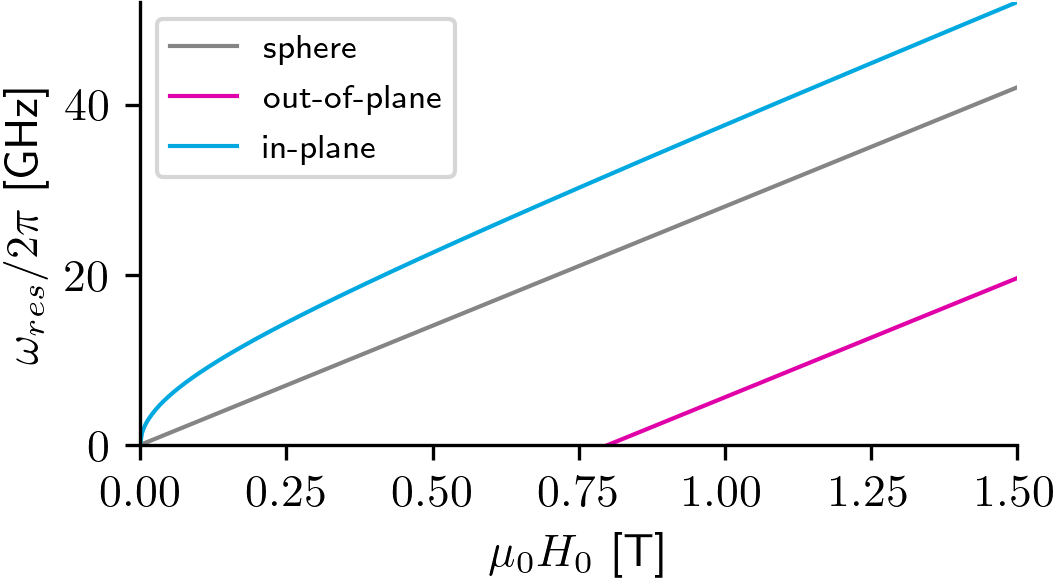

In [171]:

fig = plt.figure(1, figsize=(3.6,2))
ax = fig.add_subplot(1, 1, 1)
#ax.axis('off')
H=np.linspace(0,1.5,500)

gamma=g*q/(2*m_e)*1e-9/(2*np.pi)
mu_0=1.2566e-6 #N/A²  
M=.8
w1=H*gamma
w2=(H-M)*gamma
w3=gamma*np.sqrt(H*(H+M))
ax.plot(H,w1, label='sphere',
       color=cpd.curves(color='black')(.8)) 
ax.plot(H,w2, label='out-of-plane',
       color=cpd.curves(color='magenta')(1)) 
ax.plot(H,w3, label='in-plane',
       color=cpd.curves(color='seeblau')(1))
ax.set_ylim([0,np.max(w3)])
ax.set_xlim([0,1.5])
ax.set_xlabel('$\mu_0H_0$ [T]')
ax.set_ylabel('$\omega_{res}/2\pi$ [GHz]')
plt.legend(loc=2, prop={'size': 8})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('wres.pgf')